# Performance of Students Across 2 Portuguese Schools

## Introduction

This project aims to assess ‘Student Performance,’ as defined by a grading system in 2 Portuguese schools known as <i>Mousinho Da Silveira</i> and <i>Gabriel Pereira.</i> The dataset contains information about student demographics and statistics, gathered through questionnaires. Grades were given across three terms for the subjects Mathematics, and Portuguese language. The dataset itself was retrievd from <i>UCI Machine Learning Repository,</i> and downloaded from <i>Kaggle.com</i> (P. Cortez and A. Silva, 2008).

 As general background information, the education system of Portugal follows the framework of the International Standard Classification of Education (ISCED). The three divisions that make up Portugal’s education system are pre-school, basic education, and upper secondary education, which can be referenced as ISCED 0, ISCED 1 and 2, and ISCED 3, respectively (National Education Systems Portugal, 2022).

The basic education enlists students in 3 cycles, each corresponding to different grades up until 9th. Upper secondary education takes the students up until grade 12 through various paths, which may include dual certification or additional studies. Thereafter, post-secondary or other higher education systems may be considered. This dataset focuses on students in ISCED 3, which is upper secondary education. The grading system in Portugal is based on a 20-point scale, as seen in this dataset. For easier interpretability on grading scores, there will be a conversion to an international system (National Education Systems Portugal, 2022).

The focus of this exploratory and predictive analysis project will explore the variables in the dataset and utilize various machine learning models to make predictions. The focus for this project will be primarily to predict the final period grade, as indicated by 'G3' in the dataset, which will be converted to ‘grades_3.’ General descriptive statistics through countplot visuals will be given based on the two schools provided, including potential variables of interest. Grades for the first and second term (ie. columns 'G1' or ‘grades_1’ and 'G2' or ‘grades_2’,  respectively) are also considered for some models. 

Prior to the model building process, there will be an examination of the variables included in the dataset to facilitate a feature engineering process. This will help simplify and categorize certain variables. Then, based on this information, there will be a feature selection process, which aims to highlight the most highly correlated features to our target variable. This will be accomplished through an ANOVA f-statistic, which will compare numerical inputs to a categorical output.

The models to be used are the logistic regression, decision tree classifier, random forest classifier, gradient boosting, and XGBoost. The accuracy scores for each will be compared to determine the best performing model of the five. Then thereafter the model building process, there will be a deeper dive into the abstraction of what constitutes a ‘good’ model. This will be accomplished through a sensitivity analysis, which will include a series of repeated k-folds cross-validations to determine accuracy scores and ideal sample sizes of our model. 

General conclusions will be given based on the above results and findings on the final period grades for each school.

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
%matplotlib inline

from numpy import mean, std
from math import sqrt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Exploratory Analysis

The process of an <u>exploratory analysis</u> gives an opportunity to take a closer look at the dataset beyond what is seen just at the surface. Taking note of missing values, incorrect data points, and potential correlations through visuals will aid in understanding the dataset as a whole and give insight on where it should be further examined for future models.

For this section in particular, I will be taking note of column values, dataset type, nulls etc. I will also take a further look at a select few variables that peak my interest and assess them with the final term grades and take note of any potential patterns and correlation.

In [2]:
# loading in the dataset (student performance dataset)
stud_perfor_df = pd.read_csv('student-por.csv')
stud_perfor_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
# checking null values
stud_perfor_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
# checking columns
stud_perfor_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
# getting general information on dataset
stud_perfor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### Distribution of Final Period Grades from Entire Dataset (both schools included)

Variables of initial interest:
- sex
- age
- school
- studytime
- higher education

##### Sex

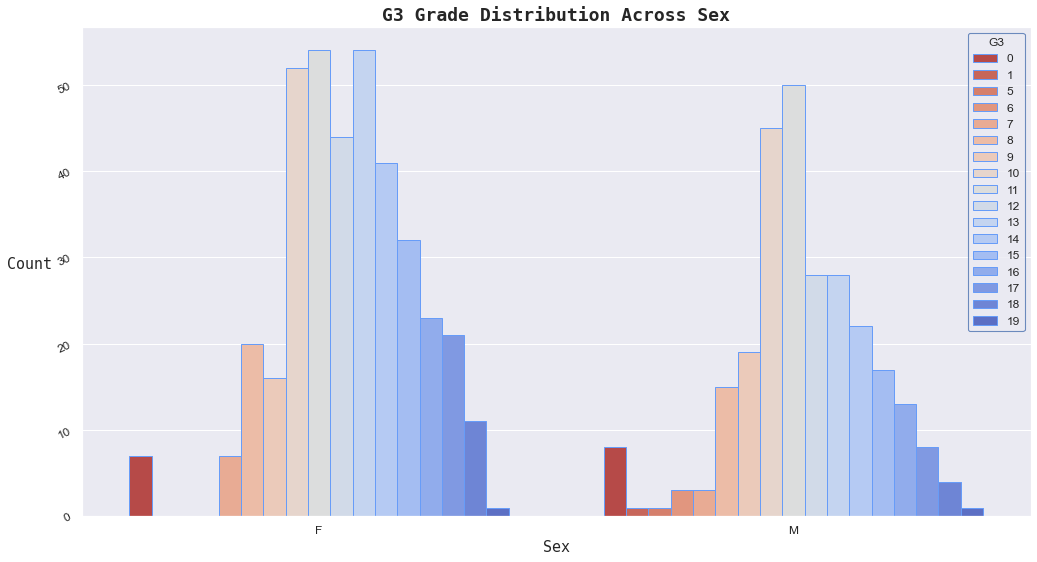

In [6]:
fig, ax = plt.subplots(figsize=(17,9))
sns.countplot(data=stud_perfor_df,x='sex',hue='G3',palette='coolwarm_r',edgecolor='#679CF8',ax=ax)

plt.xlabel('Sex',font='monospace',fontsize=15)
plt.ylabel('Count',font='monospace',fontsize=15,rotation='horizontal',ha='right')
plt.xticks(fontsize=12)
plt.yticks(rotation=25,fontsize=12)
plt.title('G3 Grade Distribution Across Sex',font='monospace',fontsize=18,fontweight='bold')

leg = plt.legend(fontsize=12,title='G3')
leg.get_frame().set_edgecolor('b')
leg.get_frame().set_linewidth(1.1)

plt.show()

<b><u><i>Insights:</i></u></b> Grades appear to be distributed fairly evenly across sexes. There are more females than males represented in these two schools, hence the higher the counts for the 'F' countplot.

##### Age

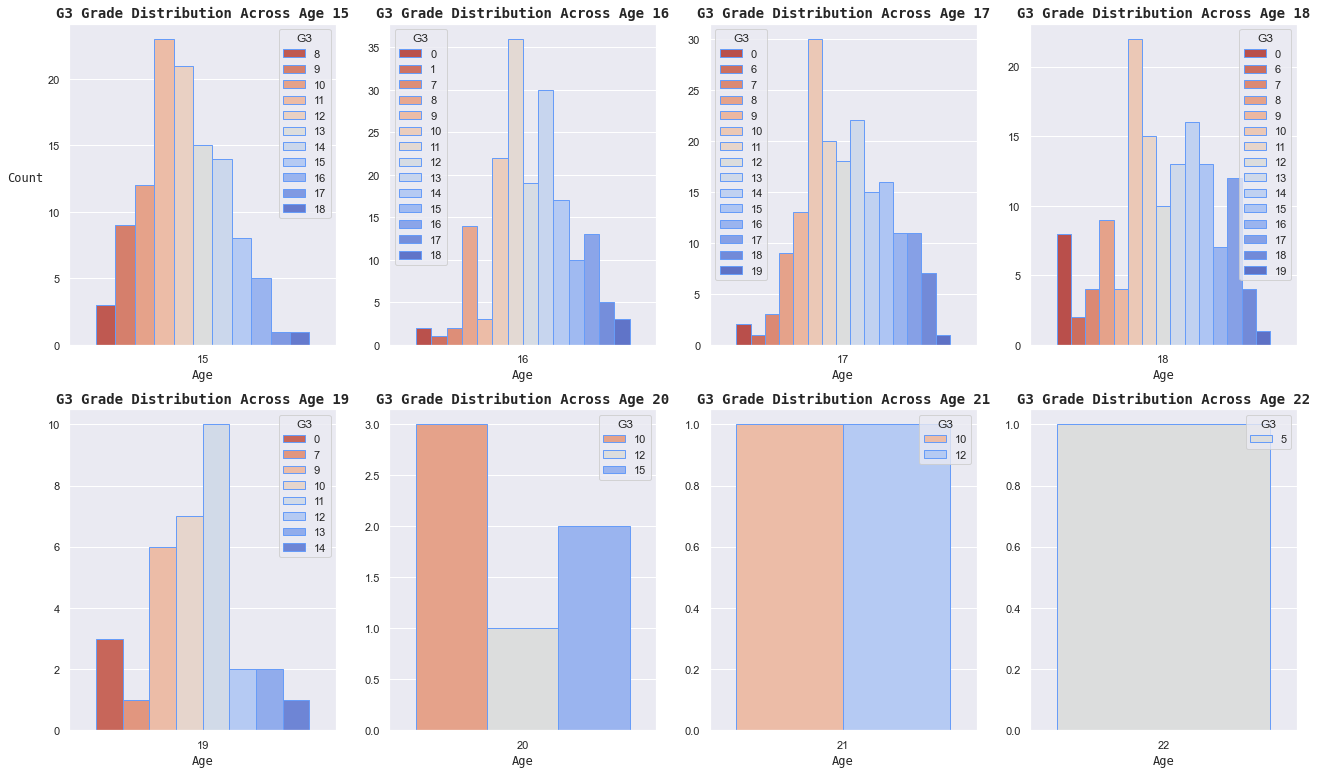

In [7]:
fig, ax = plt.subplots(2,4,figsize=(22,13))

ages = list(stud_perfor_df['age'].unique())
ages.sort(reverse=False)

q = 0 # counter
for i in ages[0:4]:
    sns.countplot(data=(stud_perfor_df[stud_perfor_df['age']==i]),x='age',hue='G3',palette='coolwarm_r',edgecolor='#679CF8',ax=ax[0,q])
    ax[0,q].set_xlabel('Age',font='monospace',fontsize=12)
    ax[0,q].set_ylabel('')
    ax[0,q].set_title('G3 Grade Distribution Across Age '+str(i),font='monospace',fontsize=14,fontweight='bold')
    ax[0,0].set_ylabel('Count',font='monospace',fontsize=12,rotation='horizontal',ha='right')
    q+=1
    
q = 0 # counter
for i in ages[4:]:
    sns.countplot(data=(stud_perfor_df[stud_perfor_df['age']==i]),x='age',hue='G3',palette='coolwarm_r',edgecolor='#679CF8',ax=ax[1,q])
    ax[1,q].set_title('G3 Grade Distribution Across Age '+str(i),font='monospace',fontsize=14,fontweight='bold')
    ax[1,q].set_xlabel('Age',font='monospace',fontsize=12)
    ax[1,q].set_ylabel('')
    ax[1,q].set_title('G3 Grade Distribution Across Age '+str(i),font='monospace',fontsize=14,fontweight='bold')
    q+=1

<b><u><i>Insights:</b></u></i> Similarly to G3 distributions based on sex, it appears to be mostly evenly distributed with ages 15-18. There are less students in the age category of 19-22, so it is more difficult to assess G3 grade distributions accordingly.

##### School

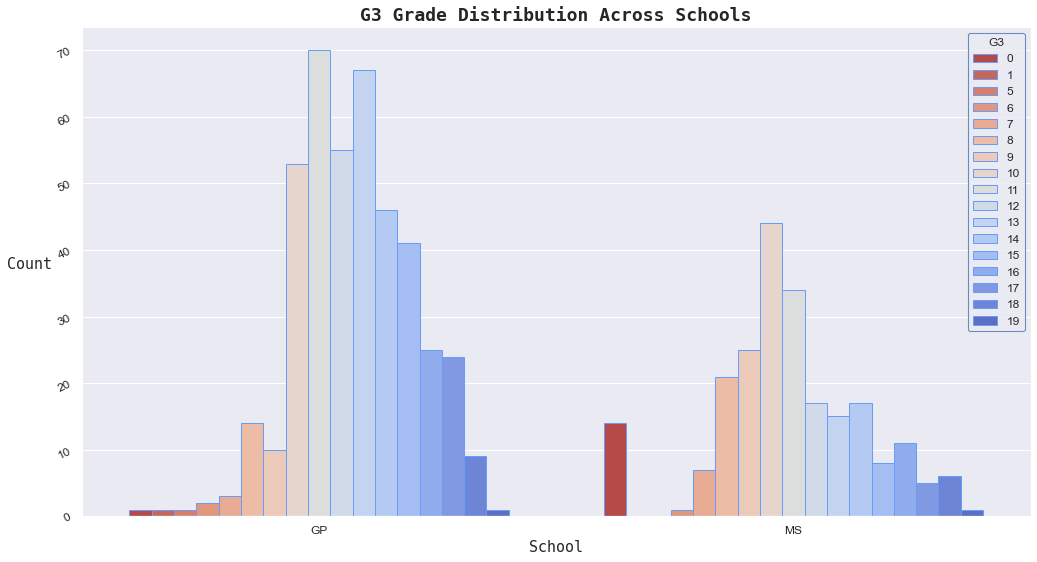

In [8]:
fig, ax = plt.subplots(figsize=(17,9))
sns.countplot(data=stud_perfor_df,x='school',hue='G3',palette='coolwarm_r',edgecolor='#679CF8',ax=ax)

plt.xlabel('School',font='monospace',fontsize=15)
plt.ylabel('Count',font='monospace',fontsize=15,rotation='horizontal',ha='right')
plt.xticks(fontsize=12)
plt.yticks(rotation=25,fontsize=12)
plt.title('G3 Grade Distribution Across Schools',font='monospace',fontsize=18,fontweight='bold')

leg = plt.legend(fontsize=12,title='G3')
leg.get_frame().set_edgecolor('b')
leg.get_frame().set_linewidth(1.1)

plt.show()

<b><u><i>Insights:</b></u></i> There are a higher number of failures (0's) for MS school despite having less data. Also, the plot for MS appears to be skewed right, with a higher ratio of grades <11 compared to the GP school, which appears more normally distributed and non-skewed.

##### Studytime

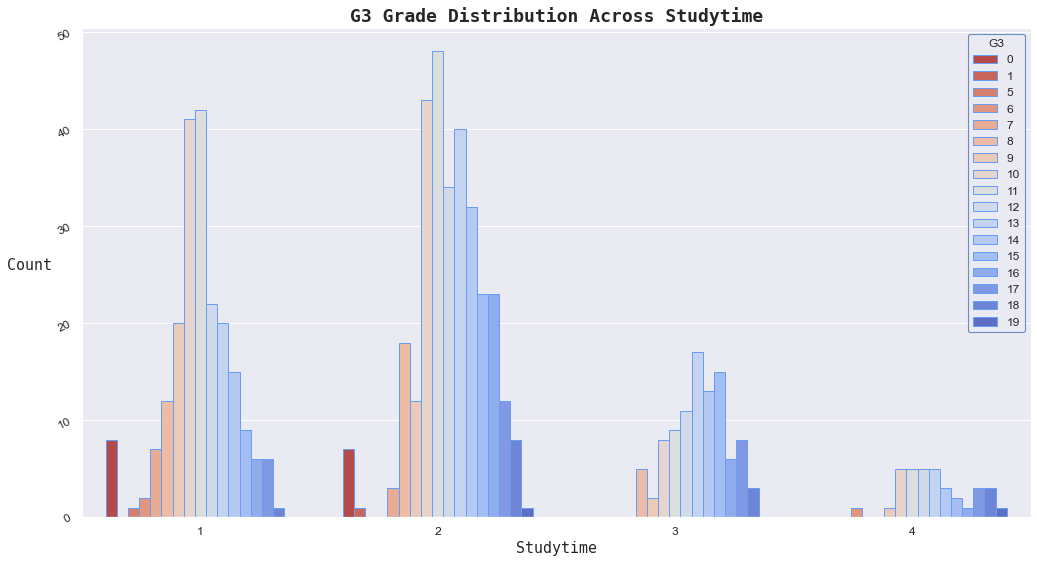

In [9]:
fig, ax = plt.subplots(figsize=(17,9))
sns.countplot(data=stud_perfor_df,x='studytime',hue='G3',palette='coolwarm_r',edgecolor='#679CF8',ax=ax)

plt.xlabel('Studytime',font='monospace',fontsize=15)
plt.ylabel('Count',font='monospace',fontsize=15,rotation='horizontal',ha='right')
plt.xticks(fontsize=12)
plt.yticks(rotation=25,fontsize=12)
plt.title('G3 Grade Distribution Across Studytime',font='monospace',fontsize=18,fontweight='bold')

leg = plt.legend(fontsize=12,title='G3')
leg.get_frame().set_edgecolor('b')
leg.get_frame().set_linewidth(1.1)

plt.show()

<b><u><i>Insights:</b></u></i> There are a higher number of failures for those that reported studying less, particularly for those with a score of 1 and 2. Overall trends amongst the scores, however, appear mostly evenly distributed.

##### Higher Education

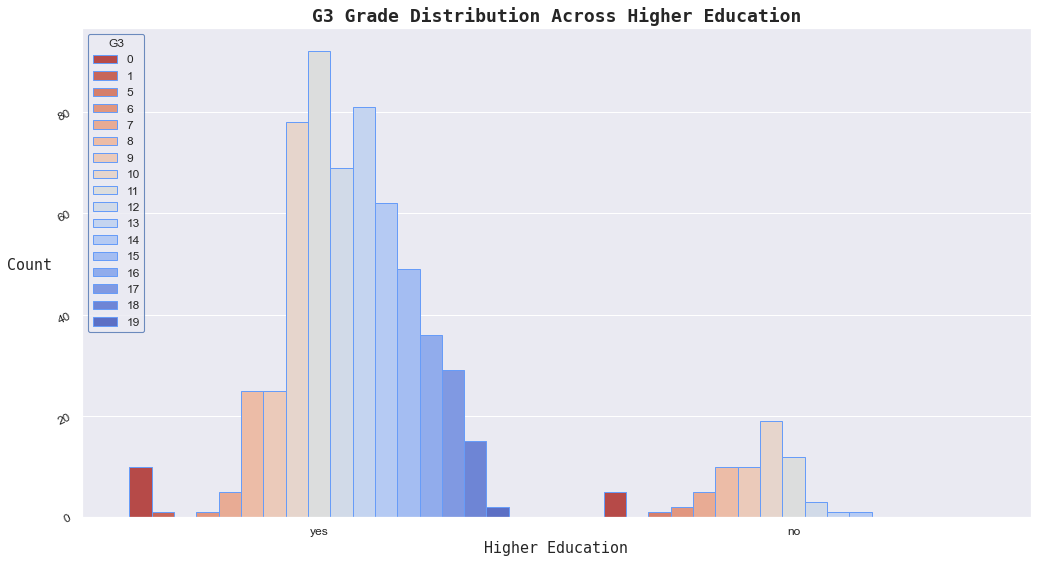

In [10]:
fig, ax = plt.subplots(figsize=(17,9))
sns.countplot(data=stud_perfor_df,x='higher',hue='G3',palette='coolwarm_r',edgecolor='#679CF8',ax=ax)

plt.xlabel('Higher Education',font='monospace',fontsize=15)
plt.ylabel('Count',font='monospace',fontsize=15,rotation='horizontal',ha='right')
plt.xticks(fontsize=12)
plt.yticks(rotation=25,fontsize=12)
plt.title('G3 Grade Distribution Across Higher Education',font='monospace',fontsize=18,fontweight='bold')

leg = plt.legend(fontsize=12,title='G3')
leg.get_frame().set_edgecolor('b')
leg.get_frame().set_linewidth(1.1)

plt.show()

<b><u><i>Insights:</b></u></i> Those who reported not wanting to pursue higher education have noticeably worse (<10; failing) scores for G3, as opposed to their counterparts. This is the clearest correlation to our target variable, G3, in our analysis yet.

<b><u><i>Exploratory Analysis Overall Insights:</b></u></i>
- No missing values; therefore, no imputation required
- 30 potential features to be used for our predictive models; which are the best features?
- Pursuing higher education, studytime reported and the school itself appear to have some influence on G3 scores
- Numerical inputs have range of values, such as grades for each term and number of absences, as seen above; these can be grouped into categories for simplification
- It is difficult to see precise correlations with above plots; we need feature selection

## Feature Engineering

The process of <u>feature engineering</u> includes taking the variables in the dataset that have been corrected, if needed, through processes such as imputation, and synthesize them further for better processing in the models. In this case, it might help to simplify some variables with a lot of different numerical values into a smaller categorical range. The synthesization of such variables will allow for better predictions in our final models, as well as faster computing and easier interpretability for users. 

For this portion, there will be a categorization of a select few variables, which will greatly simplify the later modeling processes. In particular:

- Categorize number of absences
- Categorize students as first-generation or non-first-generation
- Switch the Portuguese grading system to that of an international letter-based one for easier interpretability

In [11]:
# create copy of dataset to make the modifications
stud_perf_df = stud_perfor_df.copy()

<u>Portuguese grading system (numerical grade) to international grading system (letter grade):</u>
- A: 20-18
- B: 17-16
- C: 15-14
- D: 13-12
- E: 11-10
- F: <10 

(The Portuguese grading system, 2022)

In [12]:
# converting to international grade system

# duplicating the columns
stud_perf_df['grades_1'] = stud_perf_df['G1']
stud_perf_df['grades_2'] = stud_perf_df['G2']
stud_perf_df['grades_3'] = stud_perf_df['G3']

# obtaining letter grades
grades = []
terms = ['grades_1','grades_2','grades_3']
for k in terms:
    grades=[]
    for i in stud_perf_df[k]:
        if i>=18:
            grades.append('A')
        elif (i>=16) & (i<18):
            grades.append('B')
        elif (i>=14) & (i<16):
            grades.append('C')
        elif (i>=12) & (i<14):
            grades.append('D')
        elif (i>=10) & (i<12):
            grades.append('E')
        else:
            grades.append('F')
    stud_perf_df[k] = grades

# dropping original columns
stud_perf_df.drop(['G1','G2','G3'],axis=1,inplace=True)
stud_perf_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,grades_1,grades_2,grades_3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,F,E,E
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,F,E,E
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,D,D,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,C,C,C
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,E,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,E,E,E
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,C,C,B
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,E,D,F
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,E,E,E


<u>Absences Categories:</u>

- 0: no absences (perfect attendance)
- 1-2: minimal absences
- 3-5: moderate absences
- 6-10: a lot of absences
- greater than 10: excessive absences

In [13]:
# categorizing absences

absences=[]
for i in stud_perf_df['absences']:
    if i==0:
        absences.append('perfect_attendence')
    elif (i>0) & (i<3):
        absences.append('minimal')
    elif (i>2) & (i<6):
        absences.append('moderate')
    elif (i>5) & (i<11):
        absences.append('a_lot')
    else:
        absences.append('excessive')

# inserting new column and dropping original
stud_perf_df.insert(29,'absences_classified',absences)
stud_perf_df.drop(['absences'],axis=1,inplace=True)

<u>Creating column which inidcates if they are a first-gen or non-first-gen based on their parent's education status:</u>
- a score of 4: first-generation
- scores 1-3: non-first-generation

In [14]:
# converting parent education score to first-gen/non-first-gen

education_status = []

q=0
for i in stud_perf_df['Medu']:
    if i == 4:
        education_status.append('non_first_gen')
        q+=1
    else:
        if stud_perf_df['Fedu'][q]==4:
            education_status.append('non_first_gen')
            q+=1
        else:
            education_status.append('first_gen')
        
# inserting new column and dropping originals
stud_perf_df.insert(8,'education_status',education_status)
del stud_perf_df['Medu']
del stud_perf_df['Fedu']

In [15]:
# final modified dataframe from the feature engineering process
stud_perf_df

,school,sex,age,address,famsize,Pstatus,education_status,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences_classified,grades_1,grades_2,grades_3
0,GP,F,18,U,GT3,A,non_first_gen,at_home,teacher,course,...,4,3,4,1,1,3,moderate,F,E,E
1,GP,F,17,U,GT3,T,first_gen,at_home,other,course,...,5,3,3,1,1,3,minimal,F,E,E
2,GP,F,15,U,LE3,T,first_gen,at_home,other,other,...,4,3,2,2,3,3,a_lot,D,D,D
3,GP,F,15,U,GT3,T,non_first_gen,health,services,home,...,3,2,2,1,1,5,perfect_attendence,C,C,C
4,GP,F,16,U,GT3,T,first_gen,other,other,home,...,4,3,2,1,2,5,perfect_attendence,E,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,first_gen,services,other,course,...,5,4,2,1,2,5,moderate,E,E,E
645,MS,F,18,U,LE3,T,first_gen,teacher,services,course,...,4,3,4,1,1,1,moderate,C,C,B
646,MS,F,18,U,GT3,T,first_gen,other,other,course,...,1,1,1,1,1,5,a_lot,E,D,F
647,MS,M,17,U,LE3,T,first_gen,services,services,course,...,2,4,5,3,4,2,a_lot,E,E,E


<b><u><i>Feature Engineering Overall Insights:</b></u></i> 

- The conversion of a few variables and their inputs produce something more digestible for the machine learning models
- These categorizations were also needed for simplification in their conversions to dummy variables in the next section

## Feature Selection

The process of <u>feature selection</u> pinpoints the features most likely to be useful in predicting the target variable. It is crucial in terms of model accuracy and computation time to filter out redundancy in variables and only utilize features which are deemed most likely to aid in the prediction process.

In this section, there'll be a focus on indicating and selecting the 'best' features to use for the models. This will be done through an <b>ANOVA f-statistic.</b> This method is being used due to the numerical inputs (as represented by features converted to dummy variables), and categorical output, being the final grade, G3 (grades_3).

In [16]:
# getting dummy variables for the features
# accessing all columns except for grades for terms 1-3
dummy_df = pd.get_dummies(stud_perf_df[stud_perf_df.columns[0:29]])
dummy_df

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,absences_classified_a_lot,absences_classified_excessive,absences_classified_minimal,absences_classified_moderate,absences_classified_perfect_attendence
0,18,2,2,0,4,3,4,1,1,3,...,1,1,0,1,0,0,0,0,1,0
1,17,1,2,0,5,3,3,1,1,3,...,1,0,1,1,0,0,0,1,0,0
2,15,1,2,0,4,3,2,2,3,3,...,1,0,1,1,0,1,0,0,0,0
3,15,1,3,0,3,2,2,1,1,5,...,1,0,1,0,1,0,0,0,0,1
4,16,1,2,0,4,3,2,1,2,5,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,3,1,5,4,2,1,2,5,...,1,0,1,1,0,0,0,0,1,0
645,18,1,2,0,4,3,4,1,1,1,...,1,0,1,1,0,0,0,0,1,0
646,18,2,2,0,1,1,1,1,1,5,...,1,1,0,1,0,1,0,0,0,0
647,17,2,1,0,2,4,5,3,4,2,...,1,0,1,1,0,1,0,0,0,0


<b><u><i>Insights:</b></u></i> <u>Dummy variables,</u> which take the value of either 0 or 1 depending on if a particular category is absent or present, respectively, are very important in the construction of ML models. This is because they allow the formation of one regression equation as opposed to several, granting easier computations as a result. It allows for more general comparisons to be made between categorical variables, as turned numerical from the dummy inputs.

### ANOVA f-statistic

In [17]:
# finding the 'best' features-- the features with most likelihood to predict the final term grade ('grades_3')

df_features = list(dummy_df.columns)
X = dummy_df[df_features]
y = stud_perf_df['grades_3']

# 80/20 split 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

# selecting all features
fs = SelectKBest(score_func=f_classif, k='all')

# accessing relationship from training
fs.fit(X_train,y_train)

# transforming data
X_train_fs = fs.transform(X_train)

# transforming validation inputs
X_val_fs = fs.transform(X_val)

In [18]:
# sorting the f-statistic scores for each feature from highest to lowest
feat_w_scores = dict(zip(list(X.columns),list(fs.scores_)))
feat_w_scores_sorted = sorted(feat_w_scores.items(), key=lambda item: item[1],reverse=True)
feat_w_scores_sorted_df = pd.DataFrame(feat_w_scores_sorted,columns=['feature','f_statistic_score'])
feat_w_scores_sorted_df

,feature,f_statistic_score
0,failures,25.128731
1,higher_yes,18.306375
2,higher_no,18.306375
3,school_GP,12.198192
4,school_MS,12.198192
5,studytime,7.006628
6,education_status_non_first_gen,6.393359
7,education_status_first_gen,6.393359
8,Mjob_at_home,5.784505
9,Dalc,5.086585


<b><u><i>Insights:</b></u></i> The <u>f-statistic</u> for ANOVA represents the ratio of 2 variances. This ratio of variances between sample means and those within the sample help determine model significance. A ‘high’ f-statistic indicates a lower p-value, thus, indicating more significance in our model.

<b><u><i>Feature Selection Overall Insights:</b></u></i> 
- Previous class failures, their desire to pursue higher education, and the school they go to appear to be useful in predicting the final grade for term 3
- Additionally, the newly created column on 'first-gen' and 'non-first-gen' are within the top 10 highest scores

## Model Building

For this section, the following models will be utilized:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting
- XGBoost

It's important not to simply use all variables, as it can significantly increase computing time as well as reduce overall accuracy. Therefore, only the features with f-statistic scores >5 will be selected for the models. 

In [19]:
# defining feature selection function
def feat_sel(X_train,X_val,y_train,y_val):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')

    # learn relationship from training data
    fs.fit(X_train,y_train)

    # transform train input data
    X_train_fs = fs.transform(X_train)

    # transform validation input data
    X_val_fs = fs.transform(X_val)

    feat_w_scores = dict(zip(list(X.columns),list(fs.scores_)))

    feat_w_scores_sorted = sorted(feat_w_scores.items(), key=lambda item: item[1],reverse=True)
    return feat_w_scores_sorted

In [20]:
# defining the models

# logistic regression
def log_model(X_train,y_train,X_val,y_val):
    log_mod = LogisticRegression()
    log_mod.fit(X_train, y_train)
    log_model_score = accuracy_score(y_val,log_mod.predict(X_val))
    return (log_model_score)

# decision tree classifier
def dec_tree_model(X_train,y_train,X_val,y_val):
    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(X_train,y_train)
    dec_tree_score = accuracy_score(y_val,dec_tree.predict(X_val))
    return (dec_tree_score)

# random forest classifier
def rand_for_model(X_train,y_train,X_val,y_val):
    rand_for = RandomForestClassifier()
    rand_for.fit(X_train,y_train)
    rand_for_score = accuracy_score(y_val,rand_for.predict(X_val))
    return (rand_for_score)

# gradient boosting classifier
def grad_boos_model(X_train,y_train,X_val,y_val):
    grad_boos = GradientBoostingClassifier()
    grad_boos.fit(X_train,y_train)
    grad_boos_score = accuracy_score(y_val,grad_boos.predict(X_val))
    return (grad_boos_score)

# xgboost classifier
def xgb_class_model(X_train,y_train,X_val,y_val):
    xgb_class = XGBClassifier(booster='gbtree',learning_rate=0.1,max_depth=5,n_estimators=180)
    xgb_class.fit(X_train,y_train)
    xgb_class_score = accuracy_score(y_val,xgb_class.predict(X_val))
    return (xgb_class_score)
    
# defining list of models; used for the construction of dataframe
model_type = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boost','XGBoost']

##### Model Analysis: using features with f-statistic score >5 to predict 'grades_3' (both schools)

In [21]:
# assessing different model types

# using only features w/ f-statistic score >5
new_features = []

for key in feat_w_scores_sorted[0:10]:
    new_features.append(key[0])
    
y = stud_perf_df['grades_3']
X = dummy_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

scores = []

scores.append(log_model(X_train,y_train,X_val,y_val))
scores.append(dec_tree_model(X_train,y_train,X_val,y_val))
scores.append(rand_for_model(X_train,y_train,X_val,y_val))
scores.append(grad_boos_model(X_train,y_train,X_val,y_val))
scores.append(xgb_class_model(X_train,y_train,X_val,y_val))

# creating the dataframe
scores_df = pd.DataFrame(list(zip(model_type,scores)),columns=['Model Type','Score'])
scores_df.style.set_precision(4).highlight_max()

,Model Type,Score
0,Logistic Regression,0.3385
1,Decision Tree,0.3231
2,Random Forest,0.3615
3,Gradient Boost,0.3615
4,XGBoost,0.3769


<b><u><i>Insights:</b></u></i> The scores above indicate low predictability with the selected variables, even when using the features with the greatest predictive power for 'grades_3.' The highest score came from the XGBoost model, at a value of around 37-38% accuracy. What constitutes a 'good' model score is very subjective, but a general consensus and conclusion can most likely be made that a score from 30 - 40 is not particularly great.

<b> Questions </b>

How would scores change through various circumstances? Ie.

- Will using the first two term grades, 'grades_1' and 'grades_2,' improve the predictive power on 'grades_3'?
- How about just using 'grades_1'?
- How are the ML scores affected by isolating each school individually?

These questions will be addressed in this upcoming section.

In [22]:
# feature selection

# getting dummies and including 'grades_1' and 'grades_2' in the analysis
dummy_df = pd.get_dummies(stud_perf_df[stud_perf_df.columns[0:31]])

df_features = list(dummy_df.columns)
X = dummy_df[df_features]
y = stud_perf_df['grades_3']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

pd.DataFrame(feat_sel(X_train,X_val,y_train,y_val), columns=['feature','f_statistuc_score']).head(25)


,feature,f_statistuc_score
0,grades_2_F,142.933002
1,grades_1_F,107.370327
2,grades_2_D,103.773821
3,grades_2_B,88.585147
4,grades_1_A,87.395786
5,grades_2_C,74.239024
6,grades_2_E,71.629439
7,grades_2_A,67.094784
8,grades_1_B,49.044108
9,grades_1_C,43.984133


<b><u><i>Insights:</b></u></i> Not so much surprisingly, the grades for the first two terms have high correlation with the final term grade. The features with scores >10 will be used for the models (total of 17 features). This will be used as a baseline for subsequent model calculations.

##### Model Analysis: using features with f-statistic score >10 (17 features total) to predict 'grades_3'

In [23]:
new_features = []

for key in feat_sel(X_train,X_val,y_train,y_val)[0:17]:
    new_features.append(key[0])

y = stud_perf_df['grades_3']
X = dummy_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

scores = []

# assessing diff model scores
scores.append(log_model(X_train,y_train,X_val,y_val))
scores.append(dec_tree_model(X_train,y_train,X_val,y_val))
scores.append(rand_for_model(X_train,y_train,X_val,y_val))
scores.append(grad_boos_model(X_train,y_train,X_val,y_val))
scores.append(xgb_class_model(X_train,y_train,X_val,y_val))

# creating the dataframe
scores_df = pd.DataFrame(list(zip(model_type,scores)),columns=['Model Type','Score'])
scores_df.style.set_precision(4).highlight_max()

,Model Type,Score
0,Logistic Regression,0.7385
1,Decision Tree,0.7615
2,Random Forest,0.7462
3,Gradient Boost,0.7462
4,XGBoost,0.7462


<b><u><i>Insights:</b></u></i> Scores improved significantly! There is now a range of about 73-75% accuracy. This range is usually deemed a 'good' and more realistic score in the ML world.

<u>Taking a closer look at the five features with the highest f-statistic scores; indicating high correlation with the final term grade:</u>
- higher education
- school
- failures
- grades_1
- grades_2

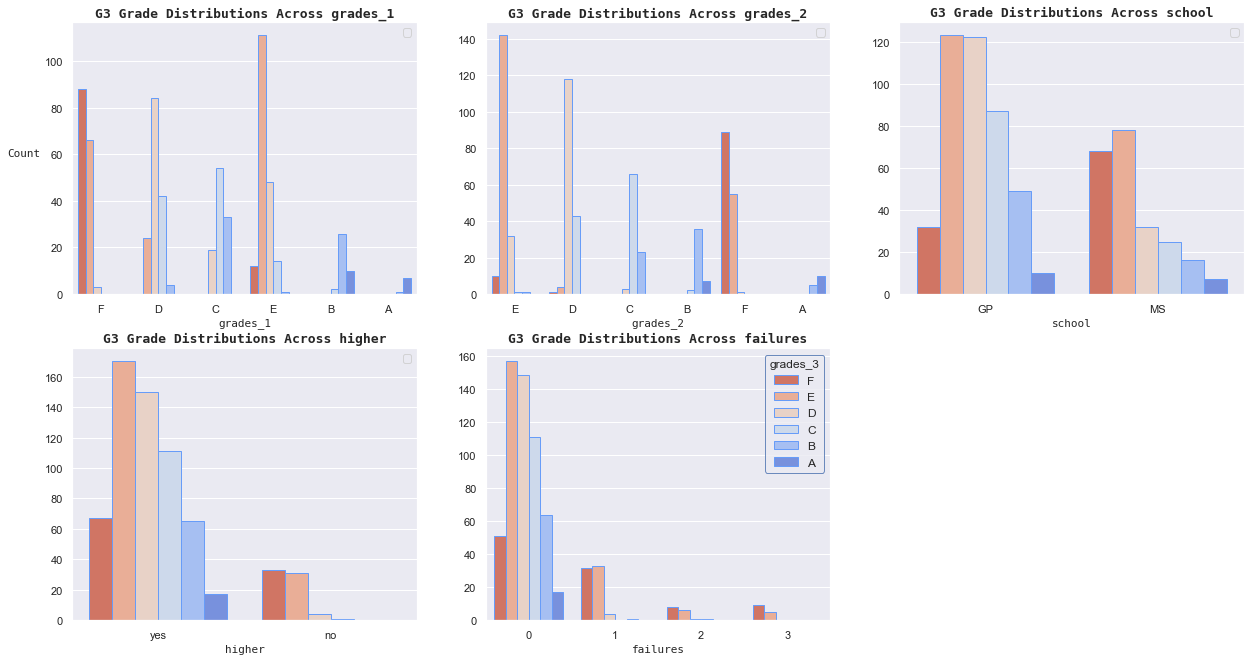

In [24]:
fig,ax=plt.subplots(2,3,figsize=(21,11))
top_feats = ['grades_1','grades_2','school','higher','failures']
hue_order = ['F','E','D','C','B','A']

for i in range(0,3):
    sns.countplot(data=stud_perf_df,x=top_feats[i],hue='grades_3',hue_order=hue_order,palette='coolwarm_r',edgecolor='#679CF8',ax=ax[0,i])
    ax[0,i].set_xlabel(top_feats[i],font='monospace',fontsize=11)
    ax[0,i].set_ylabel('')
    ax[0,i].set_title('G3 Grade Distributions Across '+top_feats[i],font='monospace',fontsize=13,fontweight='bold')
    ax[0,i].legend('')
    
for i in range(0,2):
    sns.countplot(data=stud_perf_df,x=top_feats[i+3],hue='grades_3',hue_order=hue_order,palette='coolwarm_r',edgecolor='#679CF8',ax=ax[1,i])
    ax[1,i].set_xlabel(top_feats[i+3],font='monospace',fontsize=11)
    ax[1,i].set_ylabel('')
    ax[1,i].set_title('G3 Grade Distributions Across '+top_feats[i+3],font='monospace',fontsize=13,fontweight='bold')
    ax[1,i].legend('')

ax[0,0].set_ylabel('Count',font='monospace',fontsize=11,rotation='horizontal',ha='right')
ax[1,1].legend(labels=hue_order,loc='upper right', fontsize=12,title='grades_3',edgecolor='b')

fig.delaxes(ax[1,2])

plt.show()

##### Model Analysis: using only 'grades_1' and NOT 'grades_2' to predict 'grades_3' (both schools)

In [25]:
dummy_df = pd.get_dummies(stud_perf_df[stud_perf_df.columns[0:30]])

X = dummy_df
y = stud_perf_df['grades_3']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

new_features = []

for key in feat_sel(X_train,X_val,y_train,y_val)[0:17]:
    new_features.append(key[0])
    
X = dummy_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

scores = []

# assessing diff model scores
scores.append(log_model(X_train,y_train,X_val,y_val))
scores.append(dec_tree_model(X_train,y_train,X_val,y_val))
scores.append(rand_for_model(X_train,y_train,X_val,y_val))
scores.append(grad_boos_model(X_train,y_train,X_val,y_val))
scores.append(xgb_class_model(X_train,y_train,X_val,y_val))

# creating the dataframe
scores_df = pd.DataFrame(list(zip(model_type,scores)),columns=['Model Type','Score'])
scores_df.style.set_precision(4).highlight_max()

,Model Type,Score
0,Logistic Regression,0.5923
1,Decision Tree,0.4846
2,Random Forest,0.5462
3,Gradient Boost,0.5154
4,XGBoost,0.5000


<b><u><i>Insights:</b></u></i> Overall better scores than when NOT using any term grades. However, first term grades ('grades_1') still doesn't hold as strong of predicitive power as when paired with second term grades ('grades_2').

### Comparing Schools: GP v. MS

In [26]:
# splitting the schools
gp_df = stud_perf_df[stud_perf_df['school']=='GP']
ms_df = stud_perf_df[stud_perf_df['school']=='MS']

<b>NOTE:</b> Will work with the top 10 highest performing features for subsequent analyses.

##### Model Analysis (scenario 1): predicting 'grades_3' WITHOUT 'grades_1' and 'grades_2' for GP school

In [27]:
# getting dummies
dummy_gp_df = pd.get_dummies(gp_df[gp_df.columns[1:29]])

# splitting dataset; features and target
X = dummy_gp_df
y = gp_df['grades_3']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

# feature selection; selecting the 'best' features
new_features = []

for key in feat_sel(X_train,X_val,y_train,y_val)[0:10]:
    new_features.append(key[0])
    
X = dummy_gp_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

scores = []

# assessing diff model scores
scores.append(log_model(X_train,y_train,X_val,y_val))
scores.append(dec_tree_model(X_train,y_train,X_val,y_val))
scores.append(rand_for_model(X_train,y_train,X_val,y_val))
scores.append(grad_boos_model(X_train,y_train,X_val,y_val))
scores.append(xgb_class_model(X_train,y_train,X_val,y_val))

# creating the dataframe
scores_df = pd.DataFrame(list(zip(model_type,scores)),columns=['Model Type','Score'])
scores_df.style.set_precision(4).highlight_max()

,Model Type,Score
0,Logistic Regression,0.3176
1,Decision Tree,0.3412
2,Random Forest,0.3529
3,Gradient Boost,0.3294
4,XGBoost,0.3294


<b><u><i>Insights:</i></u></b> The scores have dipped back to the 30-40% accuracy range, similar to when 'grades_1' and 'grades_2' were not used as features for the models ran on both schools.

##### Model Analysis (scenario 2): predicting 'grades_3' WITH 'grades_1' and 'grades_2' for GP school

In [28]:
# getting dummies
dummy_gp_df = pd.get_dummies(gp_df[gp_df.columns[1:31]])

# splitting dataset; features and target
X = dummy_gp_df
y = gp_df['grades_3']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

# feature selection; selecting the 'best' features
new_features = []

for key in feat_sel(X_train,X_val,y_train,y_val)[0:10]:
    new_features.append(key[0])
    
X = dummy_gp_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

scores = []

# assessing diff model scores
scores.append(log_model(X_train,y_train,X_val,y_val))
scores.append(dec_tree_model(X_train,y_train,X_val,y_val))
scores.append(rand_for_model(X_train,y_train,X_val,y_val))
scores.append(grad_boos_model(X_train,y_train,X_val,y_val))
scores.append(xgb_class_model(X_train,y_train,X_val,y_val))

# creating the dataframe
scores_df = pd.DataFrame(list(zip(model_type,scores)),columns=['Model Type','Score'])
scores_df.style.set_precision(4).highlight_max()

,Model Type,Score
0,Logistic Regression,0.7412
1,Decision Tree,0.7412
2,Random Forest,0.7412
3,Gradient Boost,0.7412
4,XGBoost,0.7412


<b><u><i>Insights:</b></u></i> Here, all models have lead to the same accuracy score. The score itself being above 70 reinforces the idea that utilizing 'grades_1' and 'grades_2' as features for predicting 'grades_3' is quite valuable in the analysis. 

##### Model Analysis (scenario 3): predicting 'grades_3' WITHOUT 'grades_1' and 'grades_2' for MS school

In [29]:
# getting dummies
dummy_ms_df = pd.get_dummies(ms_df[ms_df.columns[1:29]])

# splitting dataset; features and target
X = dummy_ms_df
y = ms_df['grades_3']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

# feature selection; selecting the 'best' features
new_features = []

for key in feat_sel(X_train,X_val,y_train,y_val)[0:10]:
    new_features.append(key[0])
    
X = dummy_ms_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

scores = []

# assessing diff model scores
scores.append(log_model(X_train,y_train,X_val,y_val))
scores.append(dec_tree_model(X_train,y_train,X_val,y_val))
scores.append(rand_for_model(X_train,y_train,X_val,y_val))
scores.append(grad_boos_model(X_train,y_train,X_val,y_val))
scores.append(xgb_class_model(X_train,y_train,X_val,y_val))

# creating the dataframe
scores_df = pd.DataFrame(list(zip(model_type,scores)),columns=['Model Type','Score'])
scores_df.style.set_precision(4).highlight_max()

,Model Type,Score
0,Logistic Regression,0.4565
1,Decision Tree,0.3913
2,Random Forest,0.4565
3,Gradient Boost,0.3696
4,XGBoost,0.3261


<b><i><u>Insights:</u></i></b> These set of scores are perhaps the most varied yet, ranging from 32-46% accuracy, with the logistic regression and random forest performing the best. Still, the scores have dipped in comparison to the scores when utilizing other term grades as features.

##### Model Analysis (scenario 4): predicting 'grades_3' WITH 'grades_1' and 'grades_2' for MS school

In [30]:
# getting dummies
dummy_ms_df = pd.get_dummies(ms_df[ms_df.columns[1:31]])

# splitting dataset; features and target
X = dummy_ms_df
y = ms_df['grades_3']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

# feature selection; selecting the 'best' features
new_features = []

for key in feat_sel(X_train,X_val,y_train,y_val)[0:10]:
    new_features.append(key[0])
    
X = dummy_ms_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

scores = []

# assessing diff model scores
scores.append(log_model(X_train,y_train,X_val,y_val))
scores.append(dec_tree_model(X_train,y_train,X_val,y_val))
scores.append(rand_for_model(X_train,y_train,X_val,y_val))
scores.append(grad_boos_model(X_train,y_train,X_val,y_val))
scores.append(xgb_class_model(X_train,y_train,X_val,y_val))

# creating the dataframe
scores_df = pd.DataFrame(list(zip(model_type,scores)),columns=['Model Type','Score'])
scores_df.style.set_precision(4).highlight_max()

,Model Type,Score
0,Logistic Regression,0.7826
1,Decision Tree,0.8043
2,Random Forest,0.7826
3,Gradient Boost,0.7826
4,XGBoost,0.7826


<b><u><i>Insights:</b></u></i> Wow! The accuracy went up to about 80% for the decision tree, solidifying the fact that using grades from previous terms offer high predictability for the final period grade.

<b><i><u>Model Building Overall Insights:</u></i></b>

- The range in scores across the models have varied from 30-80% in accuracy
- The decision tree, random forest and logistic regression models performed the best fairly consistently
- Utilizing 'grades_1' and 'grades_2' as features consistently increased the scores and allowed the models to predict 'grades_3' more accurately; this was the case across both schools


## Sensitivity Analysis

As can be seen from the various model analyses and scenarios above, there are a plethora of accuracy scores which vary depending on several factors, such as the machine learning model used, the number of features, as well as which features are used, and more. One area that may also play a huge role, is the size of the dataset. As it stands, the ds contains over 600 unique entires, which splits into roughly around 200 entries for one school and 400 for the other. Additionally, the actual entires that are utilized by the ML models for learning, lessen due to the 80/20 split for training and validation sets.

Are these datset sizes enough to determine it's a 'good' analysis? A common concern for using such 'small' datasets, is the potential of overfitting. This occurs when the model learns the training data so well due to its small size, and thus fails to perform as great with newer data, such as the validation set. 

This phenomenon will be further assessed and  determinations on the validitiy of the models from the dataset size alone through a process called <u>sensitivity analysis</u> will be made. Conducting a sensitivity analysis allows us to see how the level of variability from our input features impacts the model performance itself. Specifically, one can test varying sample sizes and adjust accordingly to reach as minimal error as possible. Running a sensitivity analysis will help get closer to an answer to the ambiguous question of the importance of dataset size in the world of machine learning.

To accomplish this, there will be a repeated <b>k-folds cross-validation</b> on multiple sample sizes to determine which size is most optimal. The usage of k-folds cross-validation allows for different levels of model evaluation in terms of performance based on various groups of data splits. It assesses performance based on the new data given to the model. 

<b>NOTE:</b> For the sensitivity analysis, there will be a shift in focus to the logistic regression model first. Both schools will be worked with and grades for terms 1 and 2 will be utilized as features to predict the final term grade.

In [31]:
# setting up the train_test_split with the ideal features
dummy_df = pd.get_dummies(stud_perf_df[stud_perf_df.columns[0:31]])
X = dummy_df
y = stud_perf_df['grades_3']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
new_features = []
for key in feat_sel(X_train,X_val,y_train,y_val)[0:10]:
    new_features.append(key[0])
X = dummy_df[new_features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# cross-validation function

# prepare cross-validation procedure
def cross_val_func(X_train,X_val,y_train,y_val):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    
    # create model
    log_model = LogisticRegression()

    # evaluate model
    scores = cross_val_score(log_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

cross_val_func(X_train,X_val,y_train,y_val)

Accuracy: 0.732 (0.073)


<b><i><u>Insights:</u></i></b> The above code generates the mean and standard deviation for one run of the k-folds cross-validation. It will be better to run a <b> repeated </b> k-folds cross-validation in order to take an average across the scores for each run. 

In [32]:
# repeated cross_val func
def rep_cross_val_func(X_train,X_val,y_train,y_val):
    # prepare cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # create model
    log_model = LogisticRegression()

    # evaluate model
    scores = cross_val_score(log_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

rep_cross_val_func(X_train,X_val,y_train,y_val)

Accuracy: 0.734 (0.059)


<b><u><i>Insights:</i></u></b> The score above gives an average accuracy across 3 distinct runs of repeated k-folds. It should be noted that the more runs generated, the more accurate the score, as it's being averaged. However, it will also cost a lot of computational time, so n_repeates will be kept at 3 for this analysis.

There will now be an assessment of all model types using different sample sizes.

In [33]:
# defining way in which data will be split
def split_data(x,y):
        sample_perf_df = x.sample(y)
        dummy_df = pd.get_dummies(sample_perf_df[sample_perf_df.columns[0:31]])
        X = dummy_df
        y = sample_perf_df['grades_3']
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
        
        new_features = []

        for key in feat_sel(X_train,X_val,y_train,y_val)[0:10]:
            new_features.append(key[0])
    
        X = dummy_df[new_features]
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
        
        return X_train, X_val, y_train, y_val


# defining model which will output accuracy scores
def eval_models(t):
        # assessing diff model types

        # prepare cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

        # create models
        log_model = LogisticRegression()
        dec_tree_model = DecisionTreeClassifier()
        rand_for_model = RandomForestClassifier()
        grad_boos_model = GradientBoostingClassifier()
        xgb_model = XGBClassifier(booster='gbtree',learning_rate=0.1,max_depth=5,n_estimators=180)

        # evaluate models
        log_scores = cross_val_score(log_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        dec_tree_scores = cross_val_score(dec_tree_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        rand_for_scores = cross_val_score(rand_for_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        grad_boos_scores = cross_val_score(grad_boos_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        xgb_model_scores = cross_val_score(xgb_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        
        # report performance
        print(mean(log_scores).round(4), std(log_scores).round(4), (std(log_scores)/(sqrt(len(X_train)))).round(4), '(Logistic Regression)')
        print(mean(dec_tree_scores).round(4), std(dec_tree_scores).round(4), (std(dec_tree_scores)/(sqrt(len(X_train)))).round(4), '(Decision Tree)')
        print(mean(rand_for_scores).round(4), std(rand_for_scores).round(4), (std(rand_for_scores)/(sqrt(len(X_train)))).round(4), '(Random Forest)')
        print(mean(grad_boos_scores).round(4), std(grad_boos_scores).round(4), (std(grad_boos_scores)/(sqrt(len(X_train)))).round(4), '(Gradient Boost)')
        print(mean(xgb_model_scores).round(4), std(xgb_model_scores).round(4), (std(xgb_model_scores)/(sqrt(len(X_train)))).round(4), '(XGBoost)')


In [35]:
# accuracy scores and errors of models
size = [250,300,500]
for i in size:
    x = split_data(stud_perf_df,i)
    print('Model Size: ',i)
    eval_models(x)

Model Size:  250
0.7336 0.0593 0.0026 (Logistic Regression)
0.731 0.0576 0.0025 (Decision Tree)
0.7342 0.0599 0.0026 (Random Forest)
0.7323 0.0574 0.0025 (Gradient Boost)
0.7329 0.0555 0.0024 (XGBoost)
Model Size:  300
0.7336 0.0593 0.0026 (Logistic Regression)
0.731 0.0576 0.0025 (Decision Tree)
0.7355 0.056 0.0025 (Random Forest)
0.7323 0.0574 0.0025 (Gradient Boost)
0.7329 0.0555 0.0024 (XGBoost)
Model Size:  500
0.7336 0.0593 0.0026 (Logistic Regression)
0.731 0.0576 0.0025 (Decision Tree)
0.7342 0.0548 0.0024 (Random Forest)
0.7323 0.0574 0.0025 (Gradient Boost)
0.7329 0.0555 0.0024 (XGBoost)


<b><u><i>Insights:</i></u></b> Most values for mean, standard deviation and error term appear to be the same throughout the various sample sizes. An error bar plot is given below for a clearer visual.

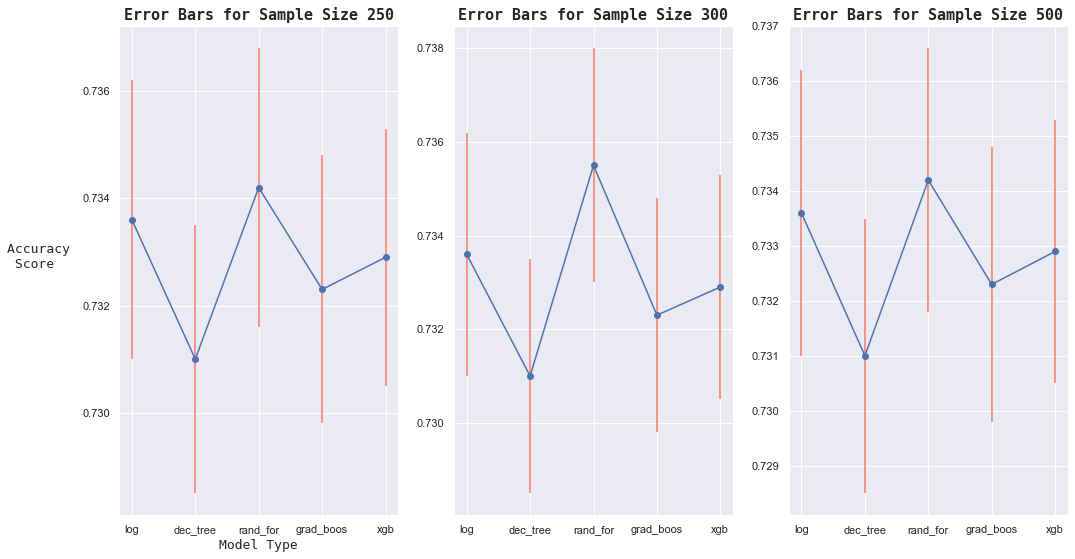

In [36]:
# error bars plot for 3 scenarios above
fig, ax = plt.subplots(1,3,figsize=(17,9))
sizes = ['log','dec_tree','rand_for','grad_boos','xgb']
err_1 = [0.0026,0.0025,0.0026,0.0025,0.0024]
acc_1 = [0.7336,0.731,0.7342,0.7323,0.7329]
err_2 = [0.0026,0.0025,0.0025,0.0025,0.0024]
acc_2 = [0.7336,0.731,0.7355,0.7323,0.7329]
err_3 = [0.0026,0.0025,0.0024,0.0025,0.0024]
acc_3 = [0.7336,0.731,0.7342,0.7323,0.7329]


ax[0].errorbar(sizes, acc_1, yerr=err_1, fmt='-o',ecolor='#F87667')
ax[0].set_title('Error Bars for Sample Size 250',font='monospace',fontsize=15,fontweight='bold')
ax[0].set_ylabel('Accuracy \n Score   ',font='monospace',fontsize=13,rotation='horizontal',ha='right')
ax[0].set_xlabel('Model Type',font='monospace',fontsize=13)

ax[1].errorbar(sizes, acc_2, yerr=err_2, fmt='-o',ecolor='#F87667')
ax[1].set_title('Error Bars for Sample Size 300',font='monospace',fontsize=15,fontweight='bold')

ax[2].errorbar(sizes, acc_3, yerr=err_3, fmt='-o',ecolor='#F87667')
ax[2].set_title('Error Bars for Sample Size 500',font='monospace',fontsize=15,fontweight='bold')

plt.show()

<b><i><u>Insights:</u></i></b> From the accuracy scores and standard errors garnered from the k-folds cross-validation run above,  across each sample size, it yields mostly similar values. Why is that? This could be a result due to not having enough data to sufficiently run k-folds. The entire dataset is limited to roughly 600+ entries, which leads to only using k-folds for even smaller sample size selections. Therefore, there will be a larger uncertainty in the accuracy scores outputted. This should be kept in mind for future studies, as such small sample sizes could yield to phenomenon mentioned previously, referred to as overfitting.

<b><i><u>Sensitivity Analysis Overall Insights:</u></i></b>
- The dataset size is very small; so much so that it could be prone to overfitting
- The sensitivity analysis revealed mosly similar scores, emphasizing the smallness of the dataset
- This confirmed that dataset size is an important part of the ML process that should always be considered and assessed accordingly

## Overview + Insights

As seen from the overall analysis above, the following generalizations, insights, and conclusions can be made:

- The exploratory analysis unvailed a connection between the pursuance of higher education, studytime reported and the school attended, with the final term grade, G3 (grades_3)
- The feature engineering portion allowed for a simplification of some variables that would be utilized for the ML models, such as the classification of absences, and categorizing first-gen vs. non-first-gen.
- Such connections to the target variable were explored through the feature selection process, in which an ANOVA f-statistic confirmed existing correlations, such as that of school attended, as well as revealed newer connections, such as first-gen and non-first-gen
- The features selected for the various models built proved to not be quite enough in predicting G3 (grades_3) with high accuracy, with scores hovering between 30-40%
- The scores improved significantly across the analysis of the dataset as a whole, as well as for the schools separately, upon considering the first 2 period grades and including them as features for the models to use. They produced amongst the highest f-statistic scores of all potential variables of interest
- The sensitivity analysis further emphasized the need for larger datasets and sample sizes, as evident by the similar mean, standard deviation, and error scores across the repeated k-folds cross-validation

Further studies and research will be required in order to better assess how select variables on students in these Portuguese schools can predict their final grades. Perhpas a deeper investigation on the information in the dataset provided will unvail an underlying pattern that can offer more accurate predictions when it comes to the final period grade, without having to utilize grades from other terms.

## References / Sources

Study in Europe. Study in Portugal. The Portuguese grading system. Published by EDALO Education Promotion Services, S.L. 2022. Retrieved from https://www.studyineurope.eu/study-in-portugal/grades


P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. Retrieved from https://www.kaggle.com/datasets/larsen0966/student-performance-data-set


European Commission. Eurydice. National Education Systems Portugal. 2022. Retrieved from https://eurydice.eacea.ec.europa.eu/national-education-systems/portugal/portugal